<a href="https://colab.research.google.com/github/smirzap/AI-dengan-DL/blob/main/evaluasi_kinerja_batchsize_GD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evaluasi Kinerja Algoritme Optimasi Gradient Descent

Eksperimen dilakukan untuk menguji akurasi dan durasi waktu. Metode yang digunakan adalah SGD_1, SGD_32 dan SGD_60K masing-masing merupakan SGD dengan jumlah batch = 1, Mini-Batch SGD dengan jumlah batch = 32 dan Batch Gradient Descent dengan jumlah batch = 60.000.

## Import library dibutuhkan

*   Import library TensorFlow untuk Deep Learning
*   Untuk penayangan hasil secara visual import tensorboard

In [ ]:
import tensorflow as tf
from tensorflow import keras

%load_ext tensorboard
import datetime

# Hapus semua rekaman data tensorboard dari eksekusi sebelumnya
!rm -rf ./logs/

In [ ]:
# Pastikan Anda menggunakan GPU agar pembuatan model NN jauh lebih cepat
!nvidia-smi

Fri Jun 30 16:16:31 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Setting Penggunaan GPU:
1. Klik menu: `Edit→Notebook Settings`
2. Pilih `GPU` dari menu drop-down `Hardware Accelerator`



## Penyiapan Dataset Fashion-MNIST


*   Eksperiment menggunakan Fashion-MNIST sebagai dataset. Dataset ini merupakan kumpulan dari  70 ribu data gambar fashion yang terdiri dari 60 ribu example pada training set (Xtrain) dan 10 ribu example pada test set (Xtest).
*   Semua gambar memiliki skala abu-abu dengan ukuran 28×28 piksel (total 784 piksel)

In [ ]:
fashion=keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion.load_data()
X_train, X_test = X_train/255.0, X_test/255.0

4422102/4422102 [==============================] - 1s 0us/step


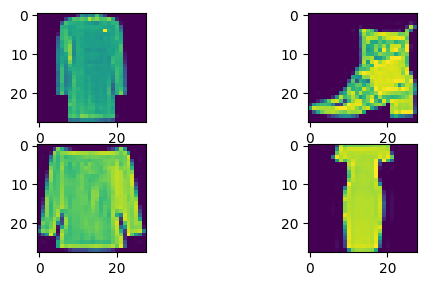

In [ ]:
# Mari kita lihat data MNIST secara random
# Anda dapat eksekusi cell ini berkali-kali dengan menekan ctrl-enter

import matplotlib.pyplot as plt
import numpy as np

i= np.random.randint(0, len(X_train)-5)
plt.subplot(3,2,1)
plt.imshow(X_train[i])
plt.subplot(3,2,2)
plt.imshow(X_train[i+1])
plt.subplot(3,2,3)
plt.imshow(X_train[i+2])
plt.subplot(3,2,4)
plt.imshow(X_train[i+3])

## Simpan nama class/kategori fashion pada vektor
Berikut adalah sepuluh label atau kategori gambar fashion.
0.	T-shirt/top
1.	Trouser
2.	Pullover
3.	Dress
4.	Coat
5.	Sandal
6.	Shirt
7.	Sneaker
8.	Bag
9.	Ankle boot

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

## Definisikan Struktur DNN dan metode evaluasinya

Struktur DNN dan metrik evaluasi:
*   **Input layer** dengan 28x28 = 784 neurons
*   **Hidden laye**r (fully connected) dengan 32 neurons dan fungsi aktivasi ReLU
*   **Output layer** (fully connected) dengan 10 neurons dan fungsi aktivasi Softmax
*   Untuk evaluasi performa akurasi dalam pengklasifikasian 10 kategori fashion, gunakan cost function cross entropy dengan optimizer SGD.
*   Pada eksperiment ini, jumlah batch (batch_size) yang berbeda-beda antar DNN

Pada setiap epoch akan ditayangkan hasil penghitungan berikut:
*   **loss** : error yang diukur pada training set
*   **accuracy** : akurasi yang diukur pada training set
*   **val_loss** : error yang diukur pada validation set
*   **val_accuracy** : akurasi yang diukur pada validation set






### Eksperimen Pertama: SGD_1

In [ ]:
# Siapkan tempat penyimpanan hasil eksperiment
dir_rekamdata = "logs/SGD_16/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=dir_rekamdata, histogram_freq=1)

# Definisikan struktur Deep Neural Network (DNN) sesuai konfigurasi/hyperparameter yang diinginkan
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28], name='input_layer'))
model.add(keras.layers.Dense(32, activation='relu', name='hidden_layer'))
model.add(keras.layers.Dense(10, activation='softmax', name='output_layer'))

# Kompilasi DNN dengan metric pengukuran kinerja dan optimizer yang diinginkan
model.compile(loss='sparse_categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

# Tayangkan deksripsi model yang telah didefinisikan
model.summary()

# Jalankan eksperiment sampai 20 epochs
# Perhatikan, 20% dari training set dipisah sebagai validation set untuk mengukur error pada setiap akhir epoch (val_loss)
# Untuk mengubah ukuran batch, tentukan nilai pada parameter batch_size. Hati-hati utk batch_size=1 karena waktu eksekusi lama.

history = model.fit(X_train, y_train, epochs=20, validation_split=0.2, batch_size=1, callbacks=[tensorboard_callback])

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4024 - accuracy: 0.8570


[0.40242403745651245, 0.8569999933242798]

### Eksperiment Kedua SGD_32

In [ ]:
# Siapkan tempat penyimpanan hasil eksperiment
dir_rekamdata = "logs/SGD_32/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=dir_rekamdata, histogram_freq=1)

# Definisikan struktur Deep Neural Network (DNN) sesuai konfigurasi/hyperparameter yang diinginkan
model2 = keras.models.Sequential()
model2.add(keras.layers.Flatten(input_shape=[28, 28]))
model2.add(keras.layers.Dense(32, activation='relu'))
model2.add(keras.layers.Dense(10, activation='softmax'))

# Kompilasi DNN dengan metric pengukuran kinerja dan optimizer yang diinginkan
model2.compile(loss='sparse_categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

# Tayangkan deksripsi model yang telah didefinisikan
model2.summary()

# Jalankan eksperiment sampai 50 epochs
# Perhatikan, 20% dari training set dipisah sebagai validation set untuk mengukur error pada setiap akhir epoch (val_loss)
# Untuk mengubah ukuran batch, tentukan nilai pada parameter batch_size. Hati-hati utk batch_size=1 karena waktu eksekusi lama.

history2 = model2.fit(X_train, y_train, epochs=5, validation_split=0.2, batch_size=32, callbacks=[tensorboard_callback])


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 32)                25120     
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.8862 - accuracy: 0.7159 - val_loss: 0.6103 - val_accuracy: 0.7934
Epoch 2/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5676 - accuracy: 0.8060 - val_loss: 0.5299 - val_accuracy: 0.8157
Epoch 3/5
1500/1500 [=======

In [ ]:
model2.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.4842 - accuracy: 0.8294


[0.4842015504837036, 0.8294000029563904]

### Eksperiment ketiga

In [ ]:
# Siapkan tempat penyimpanan hasil eksperiment
dir_rekamdata = "logs/SGD_60K/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=dir_rekamdata, histogram_freq=1)

# Definisikan struktur Deep Neural Network (DNN) sesuai konfigurasi/hyperparameter yang diinginkan
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

# Kompilasi DNN dengan metric pengukuran kinerja dan optimizer yang diinginkan
model.compile(loss='sparse_categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

# Tayangkan deksripsi model yang telah didefinisikan
model.summary()

# Jalankan eksperiment sampai 50 epochs
# Perhatikan, 20% dari training set dipisah sebagai validation set untuk mengukur error pada setiap akhir epoch (val_loss)
# Untuk mengubah ukuran batch, tentukan nilai pada parameter batch_size. Hati-hati utk batch_size=1 karena waktu eksekusi lama.

history = model.fit(X_train, y_train, epochs=20, validation_split=0.2, batch_size=60000, callbacks=[tensorboard_callback])


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_14 (Dense)            (None, 32)                25120     
                                                                 
 dense_15 (Dense)            (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
1/1 [==============================] - 1s 799ms/step - loss: 2.4958 - accuracy: 0.0988 - val_loss: 2.4551 - val_accuracy: 0.0979
Epoch 2/20
1/1 [==============================] - 0s 190ms/step - loss: 2.4499 - accuracy: 0.0987 - val_loss: 2.4184 - val_accuracy: 0.0993
Epoch 3/20
1/1 [==================

## Tayangkan hasil eksperimen

In [ ]:
%tensorboard --logdir logs/